<a href="https://colab.research.google.com/github/bentaher99/Deep-learning-module-project-/blob/main/Project_Ateliers_et_seminaires_deep_learning_Noura_Bentaher_MRSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Heart Diseases Prediction Model

**by Noura BENTAHER**

### Import libraries

In [ ]:
import pandas as pnd
import numpy as np
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import operator


import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
import seaborn as sns

from IPython.display import Image

%matplotlib inline

### Main functions defining

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 2.Problem Statement

A set of disease-predicting parameters {Ak} k=1,2..n is decided upon based on observed correlation with disease diagnosis (heart diseases in our case), where n is the number of such parameters. We also have a set of N patients {xi} that have been diagnosed with heart disease or not, and the dataset consists of the {Ak(xi)} parameter readings. where {wk}k=1,2..n is a set of weights for each of the n disease-predicting parameters (to be determined by fitting the dataset to the model). The models are aiming to predict the probability that a given patient x will be diagnosed as heart disease, and predict the weights of the features on finding the probability. When our data was a small data sets, then we hope that the model will fit the data without the risk of overfitting.

### 3.Dataset Description

The dataset used in this project is part of a database contains 14 features from Cleveland Clinic Foundation for heart disease [1]. The dataset shows different levels of heart disease presence from 1 to 4 and 0 for the absence of the disease. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1, 2, 3, 4) from absence (value 0). We have 303 rows of people data with 13 continuous observation of different symptoms.

In [ ]:
# add the rows names
header_row = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels',\
              'thal','diagnosis']

# read csv file with Cleveland heart diseases data
heart = pnd.read_csv('processed.cleveland.csv', names=header_row)
heart[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
len(heart)

303

In [ ]:
heart.shape

(303, 14)

#### As shown above, we have 303 rows of people data with 13 continous observation of different symptoms. 

## 4.Features Description
The table below, summarizes the features information:

| Feature  | Detail           | 
| ------------- |:-------------:| 
| Age      | Age in years | 
| Sex      | 1 for male; 0 for female    |  
| Chest pain type | Value1: typical angina. Value2: atypical angina. Value3: non-anginal pain. Vlaue4: asymptomatic|
| Resting blood pressure| In mm hg on admission to the hospital| 
| Serum cholesterol|In mg/dI|  
| Fasting blood sugar > 120 mg/dI|1 for true; 0 for false|  
| Resting electrocardiographic results|Value0: normal. Value1: having ST-T wave abnormality (T-wave inversions and/or ST elevation or depression of > 0.05 mV). Value2: showing probable or definite left ventricular hypertrophy by Estes’s criteria| 
|Maximum heart rate achieved| centered      |  
|Exercise-induced angina|1 for yes; 0 for no|  
|ST depression induced by exercise relative to rest|In mm Hg on admission to the hospital| 
|Number of major vessels| (0-3) colored by fluoroscopy|  
|The slope of the peak exercise ST segment|Value1: upsloping. Value2: flat. Value3: downsloping|  
|Thallium heart scan|3 for normal; 6 for fixed defect; 7 for reversible defect| 
|Diagnosis heart disease (angiographic disease)|Value0: no disease. Value1: heart disease|   

## 5.Data Exploration

In [ ]:
# get statistics values
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
blood pressure,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
electrocardiographic,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
max_heart_rate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
ST_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# get number of people with symptom X_k
names_descr = dict()
categorical_columns = ["sex", "chest_pain", "fasting_blood_sugar", "electrocardiographic", "induced_angina", "slope", "vessels", \
                       "thal", "diagnosis"]
for c in categorical_columns:
    print  (heart.groupby([c])['age'].count())

sex
0.0     97
1.0    206
Name: age, dtype: int64
chest_pain
1.0     23
2.0     50
3.0     86
4.0    144
Name: age, dtype: int64
fasting_blood_sugar
0.0    258
1.0     45
Name: age, dtype: int64
electrocardiographic
0.0    151
1.0      4
2.0    148
Name: age, dtype: int64
induced_angina
0.0    204
1.0     99
Name: age, dtype: int64
slope
1.0    142
2.0    140
3.0     21
Name: age, dtype: int64
vessels
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: age, dtype: int64
thal
3.0    166
6.0     18
7.0    117
?        2
Name: age, dtype: int64
diagnosis
0    164
1     55
2     36
3     35
4     13
Name: age, dtype: int64


### 5.1 preprocess the data, to change the missing data into mean value, using simple mean imputation methods

In [ ]:
# we have unknown values '?'
# change unrecognized value '?' into mean value through the column
for c in heart.columns[:-1]:
    heart[c] = heart[c].apply(lambda x: heart[heart[c]!='?'][c].astype(float).mean() if x == "?" else x)
    heart[c] = heart[c].astype(float)

### 5.2 Heart disease types discovering

In [ ]:
# print the types of heart disease
set(heart.loc[:, "diagnosis"].values)

{0, 1, 2, 3, 4}

#### 0 - no disease
#### 1,2,3,4 - types of disease by severity in ascending

In [ ]:
# let's calculate similarities between 1,2,3,4 levels 
# we will use euclidean distance 
vecs_1 = heart[heart["diagnosis"] == 1 ].median().values[:-2]
vecs_2 = heart[heart["diagnosis"] == 2 ].median().values[:-2]
vecs_3 = heart[heart["diagnosis"] == 3 ].median().values[:-2]
vecs_4 = heart[heart["diagnosis"] == 4 ].median().values[:-2]

In [ ]:
vecs_1

array([ 57. ,   1. ,   4. , 130. , 249. ,   0. ,   2. , 150. ,   0. ,
         0.8,   2. ,   1. ])

In [ ]:
heart[heart["diagnosis"] == 1 ]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.000000,7.0,1
16,48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.000000,7.0,1
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.000000,3.0,1
32,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.000000,3.0,1
37,57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.000000,6.0,1
44,61.0,0.0,4.0,130.0,330.0,0.0,2.0,169.0,0.0,0.0,1.0,0.000000,3.0,1
54,60.0,1.0,4.0,130.0,253.0,0.0,0.0,144.0,1.0,1.4,1.0,1.000000,7.0,1
55,54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.000000,7.0,1
56,50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.000000,7.0,1


In [ ]:
heart[heart["diagnosis"] == 1 ].median()

age                      57.0
sex                       1.0
chest_pain                4.0
blood pressure          130.0
serum_cholestoral       249.0
fasting_blood_sugar       0.0
electrocardiographic      2.0
max_heart_rate          150.0
induced_angina            0.0
ST_depression             0.8
slope                     2.0
vessels                   1.0
thal                      7.0
diagnosis                 1.0
dtype: float64

In [ ]:
print ("Similarity between type 1 and type 2 is ", np.linalg.norm(vecs_1-vecs_2))
print ("Similarity between type 1 and type 3 is ", np.linalg.norm(vecs_1-vecs_3))
print ("Similarity between type 1 and type 4 is ", np.linalg.norm(vecs_1-vecs_4))
print ("Similarity between type 2 and type 3 is ", np.linalg.norm(vecs_2-vecs_3))
print ("Similarity between type 2 and type 4 is ", np.linalg.norm(vecs_2-vecs_4))
print ("Similarity between type 3 and type 4 is ", np.linalg.norm(vecs_3-vecs_4))

Similarity between type 1 and type 2 is  10.383159442096611
Similarity between type 1 and type 3 is  21.283796653792763
Similarity between type 1 and type 4 is  29.76390431378249
Similarity between type 2 and type 3 is  13.077079184588582
Similarity between type 2 and type 4 is  27.939935576160515
Similarity between type 3 and type 4 is  29.521009467834936


In [ ]:
sim = {"(1,2)": np.linalg.norm(vecs_1-vecs_2), \
       "(1,3)": np.linalg.norm(vecs_1-vecs_3),\
       "(1,4)": np.linalg.norm(vecs_1-vecs_4),\
       "(2,3)": np.linalg.norm(vecs_2-vecs_3),\
       "(2,4)": np.linalg.norm(vecs_2-vecs_4),\
       "(3,4)": np.linalg.norm(vecs_3-vecs_4)    
      }

In [ ]:
sim

{'(1,2)': 10.383159442096611,
 '(1,3)': 21.283796653792763,
 '(1,4)': 29.76390431378249,
 '(2,3)': 13.077079184588582,
 '(2,4)': 27.939935576160515,
 '(3,4)': 29.521009467834936}

In [ ]:
# sort by the closest types
sorted_sim = sorted(sim.items(), key=operator.itemgetter(1))
sorted_sim

[('(1,2)', 10.383159442096611),
 ('(2,3)', 13.077079184588582),
 ('(1,3)', 21.283796653792763),
 ('(2,4)', 27.939935576160515),
 ('(3,4)', 29.521009467834936),
 ('(1,4)', 29.76390431378249)]

#### We can see that the mild forms of disease are more similar than 4 type of heart disease and others

In [ ]:
# we can compare the types of heart disease by using values of each feature separately 

heart_d = heart[heart["diagnosis"] >= 1 ]
heart_d[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
heart_d.shape

(139, 14)

### 5.3 Let's find the ranges of each feature by disease type

#### 5.3.1 Age

In [ ]:
print ("Minimum age to Maximum age per disease type")

heart_d.groupby(["diagnosis", ])["age"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


diagnosis
1    35.0, 70.0
2    42.0, 69.0
3    39.0, 70.0
4    38.0, 77.0
Name: age, dtype: object

In [ ]:
print ("Mean age per disease type")
heart_d.groupby(["diagnosis" ])["age"].mean()

Mean age per disease type


diagnosis
1    55.381818
2    58.027778
3    56.000000
4    59.692308
Name: age, dtype: float64

#### We can see that heart disease with type 3 can be present in lower age then type 2

#### 5.3.2 Sex

In [ ]:
print ("Count each sex per heart disease type")
heart_d.groupby(["diagnosis", "sex"])["age"].count()

Count each sex per heart disease type


diagnosis  sex
1          0.0     9
           1.0    46
2          0.0     7
           1.0    29
3          0.0     7
           1.0    28
4          0.0     2
           1.0    11
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


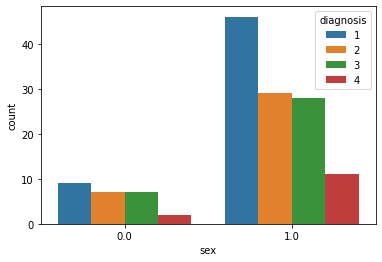

In [ ]:
sns.countplot(heart_d['sex'],hue=heart_d.diagnosis)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


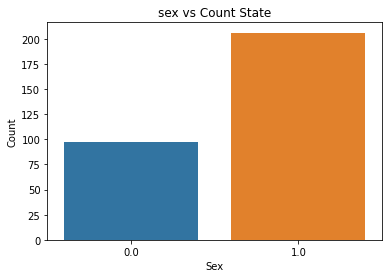

In [ ]:
sns.countplot(heart.sex)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('sex vs Count State')
plt.show()

#### We can see that heart disease all types can be present in men with higher probability than in women

#### 5.3.3 chest_pain

In [ ]:
print ("Count each chest pain value per heart disease type")
heart_d.groupby(['diagnosis','chest_pain'])['age'].count()

Count each chest pain value per heart disease type


diagnosis  chest_pain
1          1.0            5
           2.0            6
           3.0            9
           4.0           35
2          1.0            1
           2.0            1
           3.0            4
           4.0           30
3          2.0            2
           3.0            4
           4.0           29
4          1.0            1
           3.0            1
           4.0           11
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


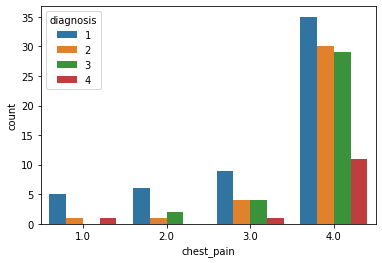

In [ ]:
sns.countplot(heart_d['chest_pain'],hue=heart_d.diagnosis)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


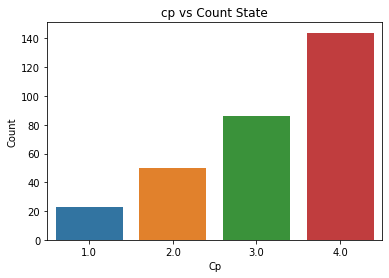

In [ ]:
sns.countplot(heart.chest_pain)
plt.xlabel('Cp')
plt.ylabel('Count')
plt.title('cp vs Count State')
plt.show()

#### The people with chest pain = 4 often have heart disease.  

#### 5.3.4 blood pressure

In [ ]:
print( "Minimum blood pressure to Maximum  blood pressure per disease type")

heart_d.groupby(["diagnosis"])["blood pressure"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["blood pressure"].max().astype(str)

Minimum blood pressure to Maximum  blood pressure per disease type


diagnosis
1    108.0, 192.0
2    100.0, 180.0
3    100.0, 200.0
4    112.0, 165.0
Name: blood pressure, dtype: object

In [ ]:
print ("Mean blood pressure per disease type")
heart_d.groupby(["diagnosis", ])["blood pressure"].mean()

Mean blood pressure per disease type


diagnosis
1    133.254545
2    134.194444
3    135.457143
4    138.769231
Name: blood pressure, dtype: float64

#### As bigger is mean blood pressure as higher is type of heart disease

#### 5.3.5 serum_cholestoral


In [ ]:
print ("Minimum serum_cholestoral to Maximum serum_cholestoral per disease type")

heart_d.groupby(["diagnosis"])["serum_cholestoral"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["serum_cholestoral"].max().astype(str)

Minimum serum_cholestoral to Maximum serum_cholestoral per disease type


diagnosis
1    149.0, 335.0
2    169.0, 409.0
3    131.0, 353.0
4    166.0, 407.0
Name: serum_cholestoral, dtype: object

In [ ]:
print ("Mean serum_cholestoral per disease type")
heart_d.groupby(["diagnosis", ])["serum_cholestoral"].mean()

Mean serum_cholestoral per disease type


diagnosis
1    249.109091
2    259.277778
3    246.457143
4    253.384615
Name: serum_cholestoral, dtype: float64

#### 5.3.6 fasting_blood_sugar

In [ ]:
print ("Count each fasting_blood_sugar per heart disease type")
heart_d.groupby(["diagnosis", "fasting_blood_sugar"])["age"].count()

Count each fasting_blood_sugar per heart disease type


diagnosis  fasting_blood_sugar
1          0.0                    51
           1.0                     4
2          0.0                    27
           1.0                     9
3          0.0                    27
           1.0                     8
4          0.0                    12
           1.0                     1
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


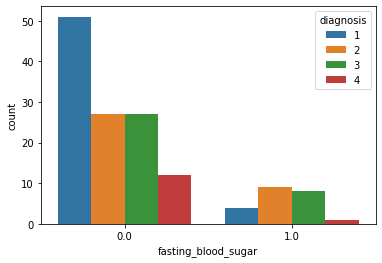

In [ ]:
sns.countplot(heart_d['fasting_blood_sugar'],hue=heart_d.diagnosis)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


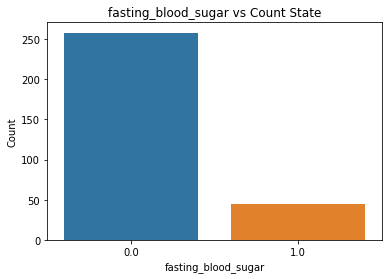

In [ ]:
sns.countplot(heart.fasting_blood_sugar)
plt.xlabel('fasting_blood_sugar')
plt.ylabel('Count')
plt.title('fasting_blood_sugar vs Count State')
plt.show()

#### 5.3.7 electrocardiographic results

In [ ]:
print ("Count each electrocardiographic per heart disease type")
heart_d.groupby(["diagnosis", "electrocardiographic"])["age"].count()

Count each electrocardiographic per heart disease type


diagnosis  electrocardiographic
1          0.0                     23
           2.0                     32
2          0.0                     19
           1.0                      1
           2.0                     16
3          0.0                     12
           1.0                      1
           2.0                     22
4          0.0                      2
           1.0                      1
           2.0                     10
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


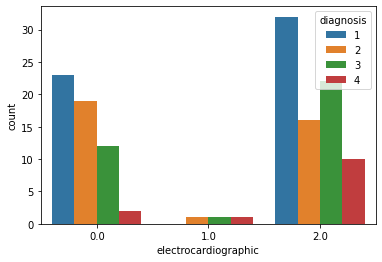

In [ ]:
sns.countplot(heart_d['electrocardiographic'],hue=heart_d.diagnosis)

#### 5.3.8 max_heart_rate

In [ ]:
print ("Minimum max_heart_rate to Maximum max_heart_rate per disease type")

heart_d.groupby(["diagnosis"])["max_heart_rate"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["max_heart_rate"].max().astype(str)

Minimum max_heart_rate to Maximum max_heart_rate per disease type


diagnosis
1     88.0, 195.0
2     71.0, 170.0
3     90.0, 173.0
4    114.0, 182.0
Name: max_heart_rate, dtype: object

In [ ]:
print ("Mean max_heart_rate per disease type")
heart_d.groupby(["diagnosis", ])["max_heart_rate"].mean()

Mean max_heart_rate per disease type


diagnosis
1    145.927273
2    135.583333
3    132.057143
4    140.615385
Name: max_heart_rate, dtype: float64

#### 5.3.9 induced_angina

In [ ]:
print ("Count  induced_angina per heart disease type")
heart_d.groupby(["diagnosis", "induced_angina"])["age"].count()

Count  induced_angina per heart disease type


diagnosis  induced_angina
1          0.0               30
           1.0               25
2          0.0               14
           1.0               22
3          0.0               12
           1.0               23
4          0.0                7
           1.0                6
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


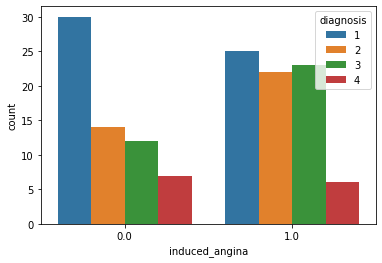

In [ ]:
sns.countplot(heart_d['induced_angina'],hue=heart_d.diagnosis)

#### 5.3.10 ST_depression

In [ ]:
print ("Minimum ST_depression to Maximum ST_depressione per disease type")

heart_d.groupby(["diagnosis"])["ST_depression"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["ST_depression"].max().astype(str)

Minimum ST_depression to Maximum ST_depressione per disease type


diagnosis
1    0.0, 3.6
2    0.0, 4.0
3    0.0, 6.2
4    0.0, 4.4
Name: ST_depression, dtype: object

In [ ]:
print( "Count  mean ST_depression per heart disease type")
heart_d.groupby(["diagnosis"])["ST_depression"].mean()

Count  mean ST_depression per heart disease type


diagnosis
1    1.005455
2    1.780556
3    1.962857
4    2.361538
Name: ST_depression, dtype: float64

#### 5.3.11 slope

In [ ]:
print ("Count slope per heart disease type")
heart_d.groupby(["diagnosis", "slope"])["age"].count()

Count slope per heart disease type


diagnosis  slope
1          1.0      22
           2.0      31
           3.0       2
2          1.0       7
           2.0      26
           3.0       3
3          1.0       6
           2.0      24
           3.0       5
4          1.0       1
           2.0      10
           3.0       2
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


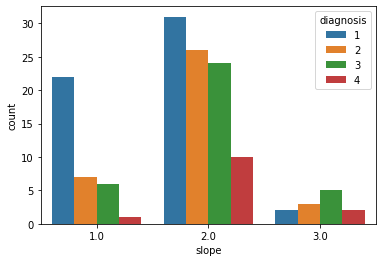

In [ ]:
sns.countplot(heart_d['slope'],hue=heart_d.diagnosis)

#### 5.3.12 vessels

In [ ]:
print ("Count  mean vessels per heart disease type")
heart_d.groupby(["diagnosis"])["vessels"].mean()

Count  mean vessels per heart disease type


diagnosis
1    0.739495
2    1.222222
3    1.457143
4    1.692308
Name: vessels, dtype: float64

#### 5.3.13 thal

In [ ]:
print ("Minimum thal to Maximum thal per disease type")

heart_d.groupby(["diagnosis"])["thal"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["thal"].max().astype(str)

Minimum thal to Maximum thal per disease type


diagnosis
1    3.0, 7.0
2    3.0, 7.0
3    3.0, 7.0
4    3.0, 7.0
Name: thal, dtype: object

In [ ]:
print ("Count  mean thal per heart disease type")
heart_d.groupby(["diagnosis"])["thal"].mean()

Count  mean thal per heart disease type


diagnosis
1    5.345455
2    5.992617
3    6.285714
4    6.230769
Name: thal, dtype: float64

## 6- Data preprocessing

### 6.1 map dependent variable y = "diagnosis" into binary label

In [ ]:
# if "diagnosis" == 0, member does not have disease A - we put 0
# if "diagnosis" >= 1, member possess the disease A - we put 1
heart.loc[:, "diag_int"] = heart.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)

### 6.2 normalize the data

In [ ]:
# create the normalizer and fit it 
preprocessing.Normalizer().fit_transform(heart)

array([[0.19741527, 0.00313358, 0.00313358, ..., 0.01880145, 0.        ,
        0.        ],
       [0.19057465, 0.0028444 , 0.01137759, ..., 0.00853319, 0.0056888 ,
        0.0028444 ],
       [0.22578159, 0.00336987, 0.0134795 , ..., 0.02358912, 0.00336987,
        0.00336987],
       ...,
       [0.25334975, 0.00444473, 0.01777893, ..., 0.03111313, 0.0133342 ,
        0.00444473],
       [0.17495449, 0.        , 0.00613875, ..., 0.00920813, 0.00306938,
        0.00306938],
       [0.13346695, 0.00351229, 0.01053686, ..., 0.01053686, 0.        ,
        0.        ]])

## 7  Constructing the sample set

In [ ]:
# split dataset into train and test
from sklearn.model_selection import cross_validate,train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart.loc[:,'age':'thal'], \
                                                 heart.loc[:,'diag_int'], test_size=0.2, random_state=33)  

In [ ]:
X_train=preprocessing.Normalizer().fit_transform(heart_train)
X_test=preprocessing.Normalizer().fit_transform(heart_test)

In [ ]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (242, 13)
X_test : (61, 13)


## 8 Attribute sets decomposing

In [ ]:
# calculate the correlation between features

corr = heart.corr()
heart.corr().T

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,diag_int
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.222853,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.224469,0.276816
chest_pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.407075,0.414446
blood pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.157754,0.150825
serum_cholestoral,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.070909,0.085164
fasting_blood_sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.059186,0.025264
electrocardiographic,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.183696,0.169202
max_heart_rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.415040,-0.417167
induced_angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.397057,0.431894
ST_depression,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.504092,0.424510


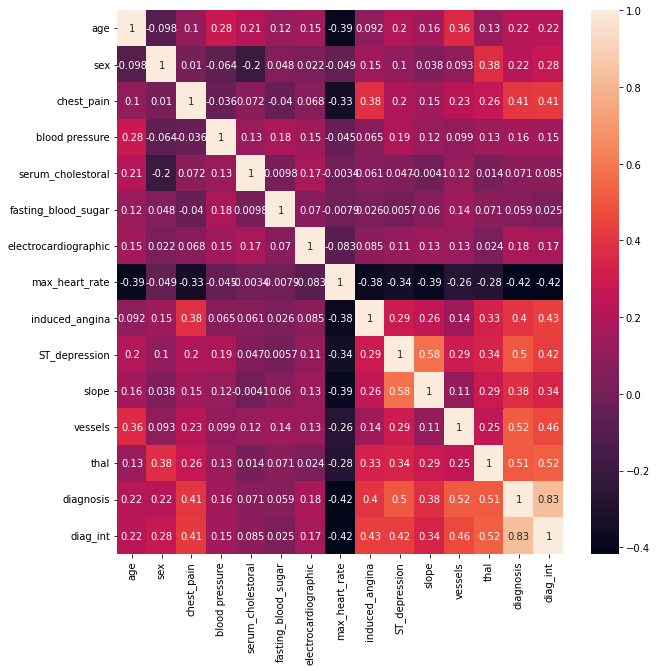

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(heart.corr(),annot=True)
plt.show()

## 9 Exploratory Visualization

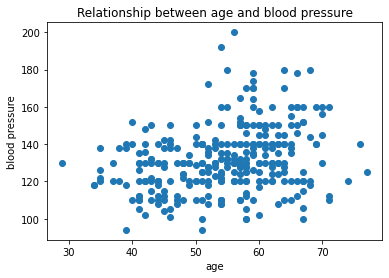

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("age")
plt.ylabel("blood pressure")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.scatter(heart['age'], heart['blood pressure'])
plt.show()

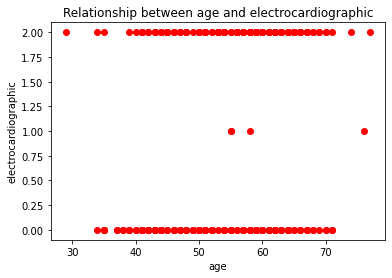

In [ ]:
plt.xlabel("age")
plt.ylabel("electrocardiographic")

# define title
plt.title("Relationship between age and electrocardiographic")

# plot
plt.scatter(heart['age'], heart['electrocardiographic'], color = 'red')
plt.show()

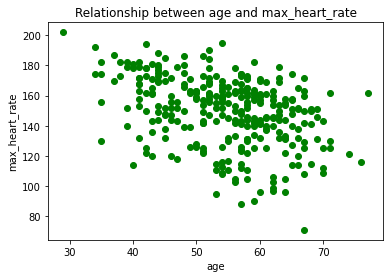

In [ ]:
plt.xlabel("age")
plt.ylabel("max_heart_rate")

# define title
plt.title("Relationship between age and max_heart_rate")

# plot
plt.scatter(heart['age'], heart['max_heart_rate'], color = 'green')
plt.show()

## 10 correlation search

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1

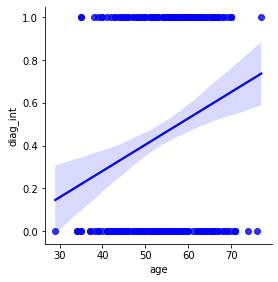

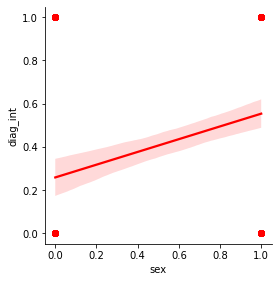

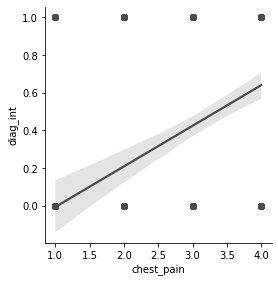

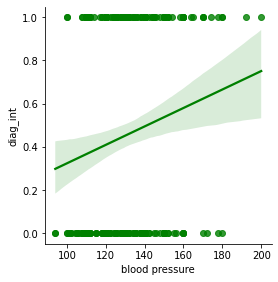

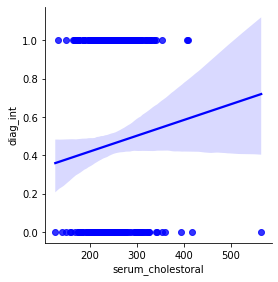

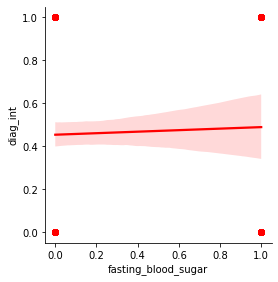

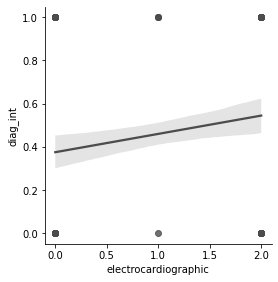

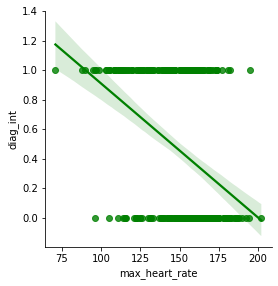

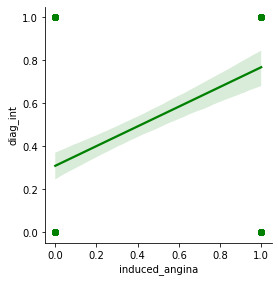

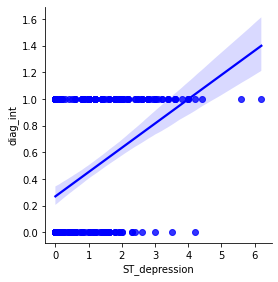

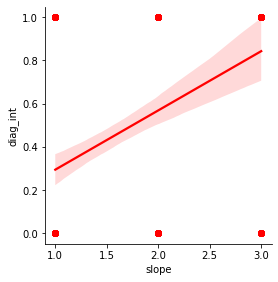

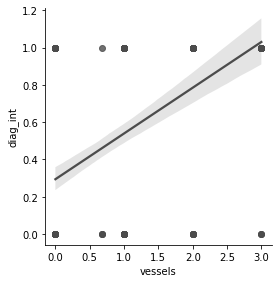

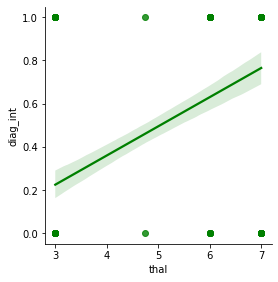

In [ ]:
# search by the correlation between dependent variable and each feature

df = heart
g1 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["age"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["sex"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["chest_pain"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["blood pressure"], size=4)
gg.map(sns.regplot, color="green")

g1 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["serum_cholestoral"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["fasting_blood_sugar"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["electrocardiographic"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["max_heart_rate"], size=4)
gg.map(sns.regplot, color="green")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["induced_angina"], size=4)
gg.map(sns.regplot, color="green")

g1 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["ST_depression"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["slope"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["vessels"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["thal"], size=4)
gg.map(sns.regplot, color="green")

#### From the charts above we can see that there are no correlation between each pair of symptoms. So, we should use them all for model building

# 11- Build our ANN model 

In [ ]:
features=heart.drop('diag_int',axis=1)

In [ ]:

from sklearn import model_selection
X = np.array(features)
y = np.array(heart['diag_int'])
X_1, X_val, y_1, y_val = model_selection.train_test_split(X, y,
                                        test_size = 0.2, random_state=33)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_1, y_1,
                                        test_size = 0.2, random_state=33)

### ANN architecture

In [ ]:
import tensorflow
import keras
print('keras version :',keras.__version__)
print('tensorflow version :',tensorflow.__version__)

keras version : 2.6.0
tensorflow version : 2.6.0


In [ ]:
from tensorflow.keras import initializers
my_init= initializers.lecun_normal(seed=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import KFold
import numpy as np

# Model configuration
batch_size = 25
no_epochs = 300
# optimizer = Adam()
verbosity = 0
num_folds = 6

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((y_train, y_val), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = Sequential()
    model.add(Dense(10, input_dim=13,activation='relu',kernel_initializer=my_init))
    model.add(Dense(8,kernel_initializer=my_init))
    model.add(Dense(4,kernel_initializer=my_init))
    model.add(Dense(1,kernel_initializer=my_init, activation='sigmoid'))
    

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


  # Generate a print
    # print('------------------------------------------------------------------------')
    # print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              validation_data=(inputs[test], targets[test]),
              verbose=verbosity)
    # #Plot the Loss Curves
    # plt.figure(figsize=[6,4])
    # plt.plot(history.history['loss'],linewidth=3.0)
    # plt.plot(history.history['val_loss'],linewidth=3.0)
    # plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    # plt.xlabel('Epochs ',fontsize=16)
    # plt.ylabel('Loss',fontsize=16)
    # plt.title(f'Loss Curves for fold {fold_no} ...',fontsize=16)

    # #Plot the Accuracy Curves
    # plt.figure(figsize=[6,4])
    # plt.plot(history.history['accuracy'],linewidth=3.0)
    # plt.plot(history.history['val_accuracy'],linewidth=3.0)
    # plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    # plt.xlabel('Epochs ',fontsize=16)
    # plt.ylabel('Accuracy',fontsize=16)
    # plt.title(f'Accuracy Curves for fold {fold_no} ...',fontsize=16)
  # Generate generalization metrics
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
# print('------------------------------------------------------------------------')
# print('Score per fold')
# for i in range(0, len(acc_per_fold)):
#     print('------------------------------------------------------------------------')
#     print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.47870779037475586; accuracy of 83.67347121238708%
Score for fold 2: loss of 0.5109656453132629; accuracy of 83.67347121238708%
Score for fold 3: loss of 0.47244566679000854; accuracy of 83.67347121238708%
Score for fold 4: loss of 0.48906397819519043; accuracy of 83.67347121238708%
Score for fold 5: loss of 0.4988083243370056; accuracy of 83.67347121238708%
Score for fold 6: loss of 0.5085967183113098; accuracy of 83.67347121238708%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 83.67347121238708 (+- 0.0)
> Loss: 0.49309802055358887
------------------------------------------------------------------------


In [ ]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(inputs)
training_data_accuracy = accuracy_score(np.round(X_train_prediction), targets)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8543307086614174


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(np.round(X_test_prediction), y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8367346938775511


### Système prédictif

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = int(np.round(model.predict(input_data_reshaped)))
print(prediction)

if (prediction == 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Truth :  0
Prediction :  1
The Person has Heart Disease


## LSTM architecture

In [ ]:
X_train_rnn=np.array(X_train).reshape(193,13,1)
y_train_rnn=np.array(y_train).reshape(193,1)
X_test_rnn=np.array(X_test).reshape(49,13,1)
y_test_rnn=np.array(y_test).reshape(49,1)
X_val_rnn=np.array(X_val).reshape(61,13,1)
y_val_rnn=np.array(y_val).reshape(61,1)

Score for fold 1: loss of 0.4505082666873932; accuracy of 83.67347121238708%
Score for fold 2: loss of 0.4596605598926544; accuracy of 81.63265585899353%
Score for fold 3: loss of 0.44719061255455017; accuracy of 83.67347121238708%
Score for fold 4: loss of 0.47039392590522766; accuracy of 83.67347121238708%
Score for fold 5: loss of 0.48948419094085693; accuracy of 83.67347121238708%
Score for fold 6: loss of 0.44808804988861084; accuracy of 81.63265585899353%
Average scores for all folds:
> Accuracy: 82.99319942792256 (+- 0.9620495836894687)
> Loss: 0.4608876009782155
------------------------------------------------------------------------


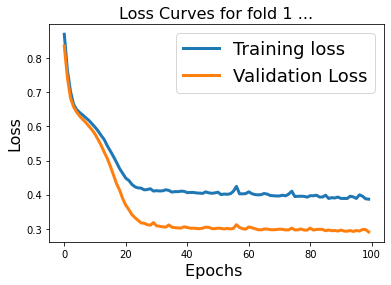

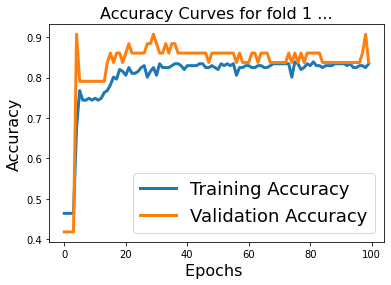

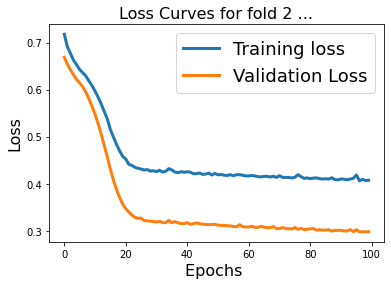

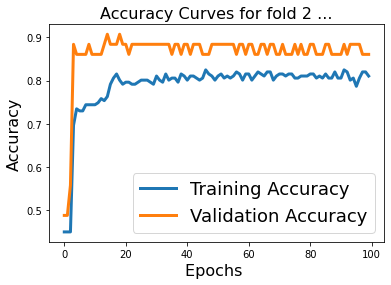

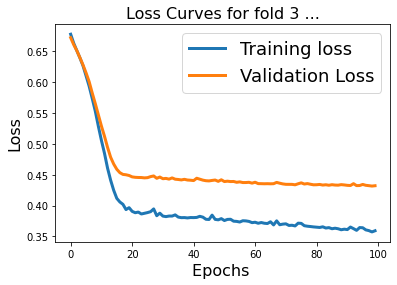

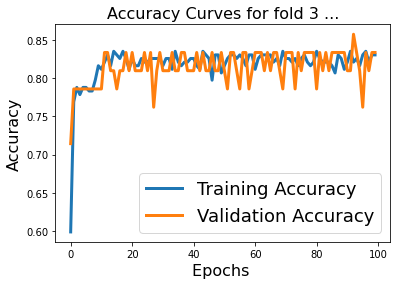

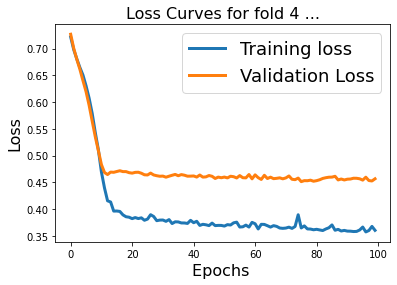

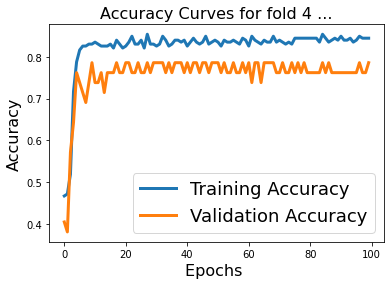

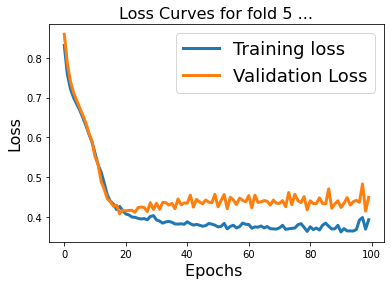

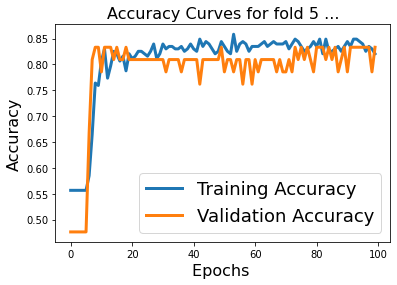

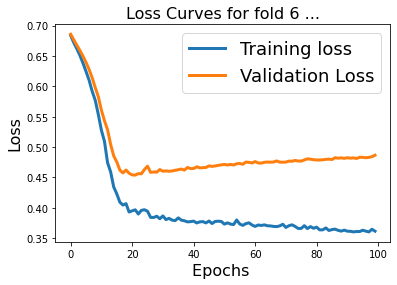

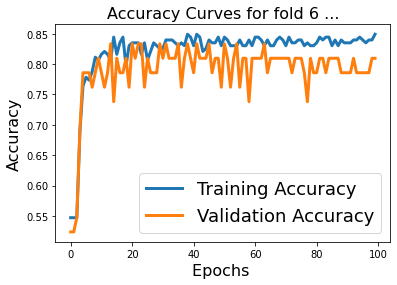

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,LSTM
from tensorflow.keras.losses import sparse_categorical_crossentropy
# from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# Model configuration
batch_size = 20
no_epochs = 100
# optimizer = Adam()
verbosity = 1
num_folds = 6

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train_rnn, X_val_rnn), axis=0)
targets = np.concatenate((y_train_rnn, y_val_rnn), axis=0)
# K-fold Cross Validation model evaluation
fold_no = 1


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model_LSTM = Sequential()
    model_LSTM.add(LSTM(10, input_shape=(13,1)))
    model_LSTM.add(Dense(10))
    model_LSTM.add(Dense(1, activation='sigmoid'))

    model_LSTM.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


  # Generate a print
    # print('------------------------------------------------------------------------')
    # print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history_LSTM = model_LSTM.fit(inputs[train], targets[train],
              batch_size=20,
              epochs=100,
              validation_data=(inputs[test], targets[test]),
              verbose=0)
    
    
    #Plot the Loss Curves
    plt.figure(figsize=[6,4])
    plt.plot(history_LSTM.history['loss'],linewidth=3.0)
    plt.plot(history_LSTM.history['val_loss'],linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title(f'Loss Curves for fold {fold_no} ...',fontsize=16)

    #Plot the Accuracy Curves
    plt.figure(figsize=[6,4])
    plt.plot(history_LSTM.history['accuracy'],linewidth=3.0)
    plt.plot(history_LSTM.history['val_accuracy'],linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title(f'Accuracy Curves for fold {fold_no} ...',fontsize=16)
  # Generate generalization metrics
    scores = model_LSTM.evaluate(X_test_rnn, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model_LSTM.metrics_names[0]} of {scores[0]}; {model_LSTM.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
# print('------------------------------------------------------------------------')
# print('Score per fold')
# for i in range(0, len(acc_per_fold)):
#     print('------------------------------------------------------------------------')
#     print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
# print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
# accuracy on training data
X_train_prediction = model_LSTM.predict(X_train_rnn)
training_data_accuracy = accuracy_score(np.round(X_train_prediction), y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8238341968911918


In [ ]:
# accuracy on test data
X_test_prediction = model_LSTM.predict(X_test_rnn)
test_data_accuracy = accuracy_score(np.round(X_test_prediction), y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8163265306122449


### Système prédictif

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1,1)

prediction = int(np.round(model_LSTM.predict(input_data_reshaped)))
print(prediction)

if (prediction== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

0
The Person does not have a Heart Disease


In [3]:
!git remote add origin https://github.com/bentaher99/Deep-learning-module-project-.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
